# Homework 0

**Name:** Andrea Gonzalez Cruz

**e-mail:** andrea.gcruz@alumnos.udg.mx

# Modules

In [7]:
# Load modules 
import matplotlib.pyplot as plt # Matplotlib is a library for creating interactive visualization
import numpy as np # Numpy is a mathematical library for Python

# Theory on the Gradient Descent algorithm

Gradient Descent is an optimization algorithm for finding a local minimum of a differentiable function, taking repeated steps in the opposite direction of the gradient of the function at the current point. 
Formally, if we start at a point X0 and move a positive distance (α) in the direction of the negative gradient, our new and improved X1 will be: 



By repeating this process, the algorithm gradually converges towards the optimal parameter values that minimize the cost. 

### The Learning Rate
The learning rate (α) has a crucial in determinate how quickly the algorithm converges to the minimum of the cost function. It controls the step size taken in each iteration of the process.
When the learning rate is too small, the algorithm takes tiny steps towards the minimum of the cost function (making the convergence process extremely slow). Also, if the learning rate is too large, gradient descent can overshoot the minimum and fail to converge.

### Rosenbrock Function
In this study case, I'm going to use the Rosenbrock function. In mathematical optimization, this is a non-convex function used as a performance test problem.
This function is known for its global minimum at point (1,1).

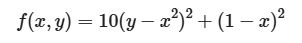


In [101]:
# Function to be optimized (Rosenbrock Function)
def f_rosen(x, y):
    return (1-x)**2 + 100*(y-x**2)**2 #Define the Rosenbrock Function
    
def dfdx(x, y): 
    return -2*(1-x) - 400*x*(y-x**2) #Derivative function for df/dx

def dfdy(x, y): 
    return 200*x*(y-x**2) #Derivative function for df/dy  

In [217]:
#Define the learning rate, number of iterations and values for initial points

#The randint method returns an integer number selected from the specified range in parenthesis
x_rosen = np.random.randint(-1, 1)
y_rosen = np.random.randint(-1, 1)

#The Z point is defined by the f_rosen function and values of the x and y points
z_rosen = f_rosen(x_rosen, y_rosen)

#Create different lists for storage each point
x_point = [x_rosen]
y_point = [y_rosen]
z_point = [z_rosen]

#The minimum value of 0 when the parameters are a = 1 and b = 100.
#Acording to 
learning_rate = 0.001
num_iterations = 1000

In [218]:
#Run the Gradient Descent algorithm
for _ in range(num_iterations):
    gradient_dx = dfdx(x_rosen, y_rosen) #Gradient evaluated in the df/dx derivate
    gradient_dy = dfdy(x_rosen, y_rosen) #Gradient evaluated in the df/dy derivate
    x_rosen = x_rosen - learning_rate * gradient_dx #Update the x point using the learning rate and gradient of the df/dx.
    y_rosen = y_rosen - learning_rate * gradient_dy #Update the y point using the learning rate and gradient of the df/dy.
    x_point.append(x_rosen) #Iterations for the x point
    y_point.append(y_rosen) #Iterations for the y point
    z_point.append(f_rosen(x_rosen, y_rosen)) #Iterations for the z point

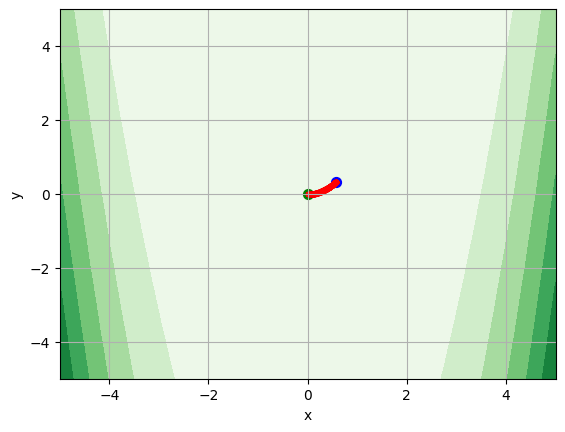

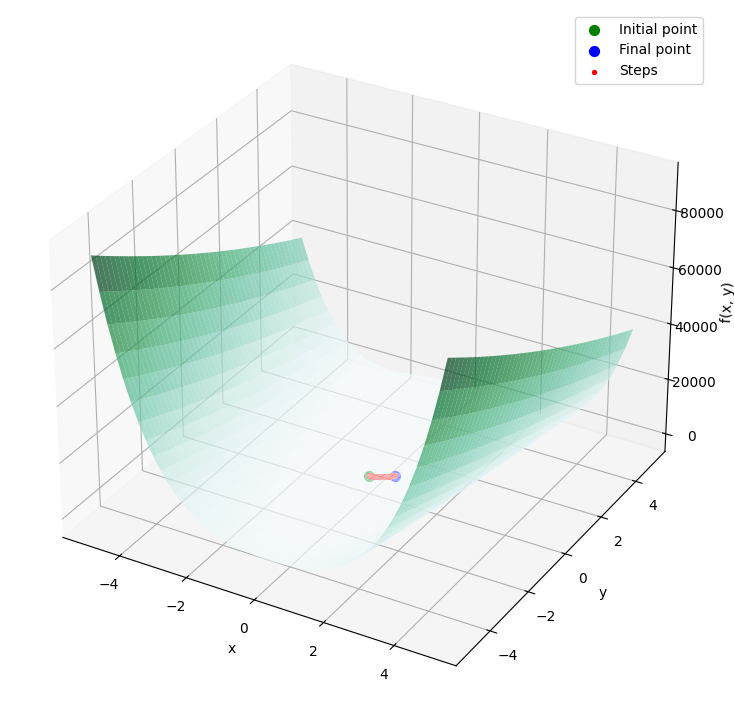

In [221]:
# Plot the results

#Meshgird to evaluate the Rosenbrock Function
#The arange function specified an initial and final values with an increment between them. In this case, the increment is 0.1
x_range = np.linspace(-5, 5, 50)
y_range = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x_range, y_range)
Z = f_rosen(X, Y)

#Desing of the 2D Graphic
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.grid()
ax.contourf(X, Y, Z, cmap='Greens')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.scatter(x_point[0],y_point[0], c='green', s=50, label="Initial point") #Set initial point
ax.scatter(x_point[-1],y_point[-1], c='blue', s=50, label="Final point") #Set final point

#Desing of the 3D Graphic
fig = plt.figure(figsize = (20,20))
ax2 = fig.add_subplot(2,2,2, projection = '3d')
ax2.grid()
ax2.plot_surface(X,Y,Z, cmap='BuGn', alpha=0.7)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('f(x, y)')
ax2.scatter(x_point[0],y_point[0],z_point[0], c='green', s=50, label="Initial point") #Set initial point
ax2.scatter(x_point[-1],y_point[-1],z_point[-1], c='blue', s=50, label="Final point") #Set final point

# Set Iterations (trayectory)
ax.scatter(x_point, y_point, marker='o', color='red', s=8, label="Steps")
ax2.scatter(x_point, y_point, z_point, marker='o', color='red', s=8, label="Steps")

plt.legend()
plt.show()